In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from hmmlearn import hmm
from numpy import ndarray

<h3>Data Preprocessing</h3>

In [89]:
original_data = pd.read_csv('./dataset/Original_Dataset.csv')
pre_processed_data = pd.concat([original_data.loc[:,'LC_X_1':'LC_Y_30'] , original_data.loc[:,'RC_X_1':'RC_Y_30']], join = 'outer', axis = 1)
#dataset_with_target = pd.concat([pre_processed_data,original_data['Gesture']],join = 'outer', axis = 1)
pre_processed_data


,LC_X_1,LC_X_2,LC_X_3,LC_X_4,LC_X_5,LC_X_6,LC_X_7,LC_X_8,LC_X_9,LC_X_10,...,RC_Y_21,RC_Y_22,RC_Y_23,RC_Y_24,RC_Y_25,RC_Y_26,RC_Y_27,RC_Y_28,RC_Y_29,RC_Y_30
0,307,389,259,259,259,259,259,258,258,259,...,185,184,184,184,185,189,190,192,194,193
1,340,340,340,340,339,339,340,339,338,338,...,181,183,182,181,179,179,180,179,179,178
2,260,263,266,266,270,271,271,271,271,271,...,190,186,186,0,183,182,184,186,186,186
3,338,339,338,337,337,337,337,337,336,335,...,186,186,184,184,183,183,183,183,183,184
4,319,240,240,318,241,318,318,318,318,318,...,194,193,194,193,195,187,187,187,187,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,309,309,309,309,309,309,309,309,310,...,0,0,0,0,0,0,0,0,0,0
346,301,300,302,302,302,301,299,300,301,302,...,0,0,0,0,0,0,0,0,0,0
347,298,295,294,292,292,290,290,288,287,287,...,0,0,0,0,0,0,0,0,0,0
348,278,278,278,277,278,277,276,276,276,276,...,0,0,0,0,0,0,0,0,0,0


In [90]:
pre_processed_data = pre_processed_data.to_numpy()

In [91]:
dict_cls = {}
for count , val in enumerate(original_data['Gesture'].unique()):
    dict_cls[val] = count+1

dict_cls

{'ZoomIn': 1,
 'ZoomOut': 2,
 'MoveLeft': 3,
 'MoveRight': 4,
 'MoveDown': 5,
 'MoveUp': 6,
 'Press': 7}

In [92]:
idx_cls =[]
for x in original_data['Gesture']:
    idx_cls.append(dict_cls[x])

idx_cls = np.array(idx_cls)

<h3>Normalization</h3>

In [93]:
normalized_data = (pre_processed_data- np.min(pre_processed_data,axis=0))/(np.max(pre_processed_data,axis=0) - np.min(pre_processed_data,axis=0))

In [94]:
data = normalized_data.reshape(350,4,30).transpose((0,2,1))
data.shape

(350, 30, 4)

In [95]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(data[0:50],idx_cls[0:50],test_size=0.2,random_state=122)
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(data[50:100],idx_cls[50:100],test_size=0.2,random_state=122)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(data[100:150],idx_cls[100:150],test_size=0.2,random_state=122)
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(data[150:200],idx_cls[150:200],test_size=0.2,random_state=122)
X_train_5,X_test_5,y_train_5,y_test_5 = train_test_split(data[200:250],idx_cls[200:250],test_size=0.2,random_state=122)
X_train_6,X_test_6,y_train_6,y_test_6 = train_test_split(data[250:300],idx_cls[250:300],test_size=0.2,random_state=122)
X_train_7,X_test_7,y_train_7,y_test_7 = train_test_split(data[300:350],idx_cls[300:350],test_size=0.2,random_state=122)

<h3>Building the Model </h3>

In [96]:
model_1 = hmm.GaussianHMM(n_components=5)
Z1 = model_1.fit(X_train_1.reshape(-1,4))
print('Model_1_score:',model_1.score(X_train_1.reshape(-1,4)))

model_2 = hmm.GaussianHMM(n_components=5)
model_2.fit(X_train_2.reshape(-1,4))
print('Model_2_score:',model_2.score(X_train_2.reshape(-1,4)))

model_3 = hmm.GaussianHMM(n_components=5)
model_3.fit(X_train_3.reshape(-1,4))
print('Model_3_score:',model_3.score(X_train_3.reshape(-1,4)))

#model_3.score(X_train_3.reshape(-1,4))


model_4 = hmm.GaussianHMM(n_components=5)
model_4.fit(X_train_4.reshape(-1,4))
print('Model_4_score:',model_4.score(X_train_4.reshape(-1,4)))



model_5 = hmm.GaussianHMM(n_components=5)
model_5.fit(X_train_5.reshape(-1,4))
print('Model_5_score:',model_5.score(X_train_5.reshape(-1,4)))


model_6 = hmm.GaussianHMM(n_components=5)
model_6.fit(X_train_6.reshape(-1,4))
print('Model_6_score:',model_6.score(X_train_6.reshape(-1,4)))

model_7 = hmm.GaussianHMM(n_components=5)
model_7.fit(X_train_7.reshape(-1,4))
print('Model_7_score:',model_7.score(X_train_7.reshape(-1,4)))

Model_1_score: 7562.4830504889605
Model_2_score: 7599.85491319462
Model_3_score: 14290.6158925597
Model_4_score: 14106.734421683284
Model_5_score: 13468.208897088078
Model_6_score: 14119.530555234032
Model_7_score: 14685.54646025967


</h3>Evaluating Test Data</h3>

In [97]:
scores = []
all_models = [model_1,model_2,model_3,model_4,model_5,model_6,model_7]

def predict_cls(sequence,list_of_models = all_models):
    scores = []
    if type(sequence) is ndarray:
        for model in all_models:
            scores.append(model.score(sequence.reshape(-1,4)))
        return np.argmax(scores)+1

def get_accuracy(y_prediction,y_actual ):
    return np.sum(y_prediction == y_actual)/len(y_actual)


In [98]:
X_test_data = np.vstack((X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6,X_test_7))
y_test_data = np.hstack((y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,y_test_7))

In [99]:
predictions = []
for seq in X_test_data:
    predictions.append(predict_cls(seq))

predictions = np.array(predictions)
accuracy = get_accuracy(predictions,y_test_data)
print(f'''Accuracy obtained by taking the maximum likelihood of all 7 models over the test dataset: {round(accuracy*100,2)}%''')

Accuracy obtained by taking the maximum likelihood of all 7 models over the test dataset: 81.43%


In [100]:
for i, model in enumerate(all_models):
    print(f'Model-{i} score - {model.score(X_test_data.reshape(-1,4))}')

Model-0 score - 4956.440644914285
Model-1 score - -381079.904907924
Model-2 score - -1553171.878947376
Model-3 score - -432796.09207893227
Model-4 score - -4148096.89901371
Model-5 score - -155059.5939181114
Model-6 score - 732.5902055176992


<h3>Sampling from the HMM </h3>

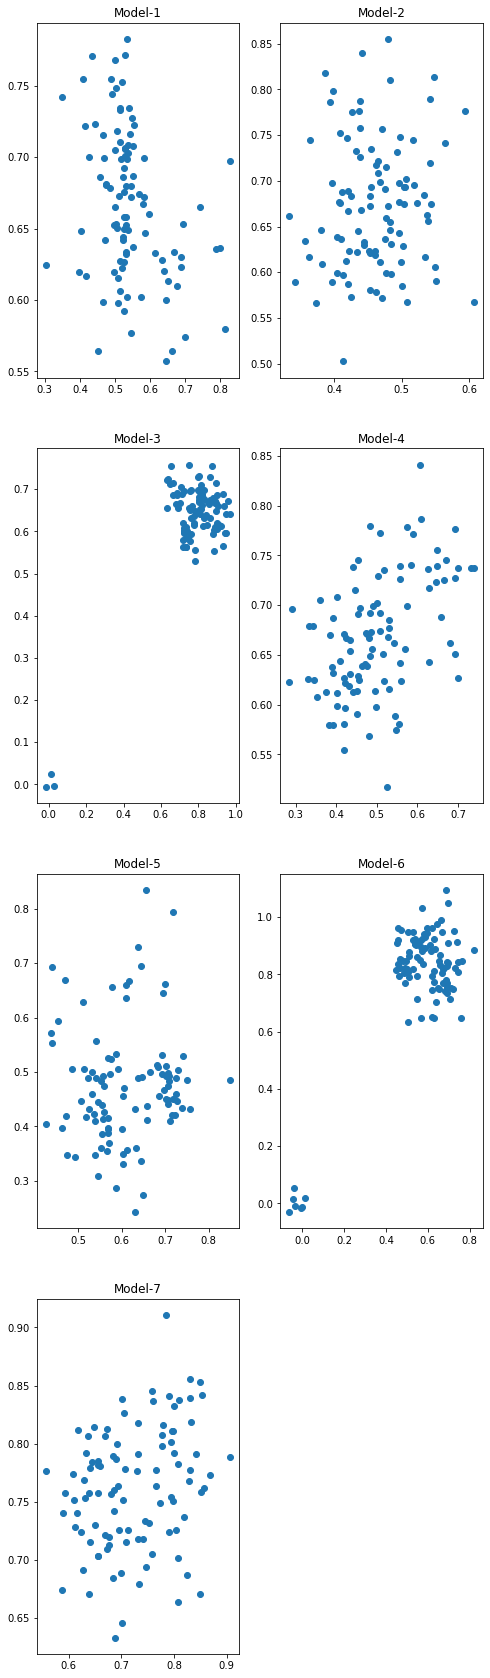

In [101]:
fig = plt.figure(figsize=[8, 30])
for i, model in enumerate(all_models):
    feature_matrix,state_sequence = model.sample(100)
    ax = fig.add_subplot(4, 2, i + 1)
    ax.scatter(feature_matrix[:, 0], feature_matrix[:, 1])
    ax.set_title("Model-{}".format(i+1))

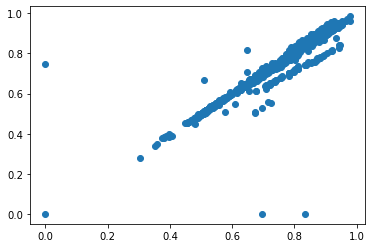

In [102]:
#Plotting Training data with features
plt.scatter(normalized_data.reshape(-1,4)[:1000, 0], normalized_data.reshape(-1,4)[:1000, 1])
plt.show()

<h3>Forward Algorithm [code obtained from professor <a href = 'https://github.com/ajdillhoff/CSE6363/blob/main/hmm/HMM_Tutorial.ipynb'>Github Page</a>]</h3>

In [103]:
class HMM():
    def __init__(self, pi, A, B):
        """Initializes an HMM initial state parameters, transition probabilities, and
        observation probabilities.
        
        Parameters
        ----------
        pi : numpy array, shape = [n_states]
             Initial state probabilities.
        A : numpy array, shape = [n_states, n_states]
            Transition matrix.
        B : numpy array, shape = [n_states, n_observations]
            Emission prbability matrix.
        """
        self.pi_ = pi
        self.A_ = A
        self.B_ = B
        self.n_states_ = A.shape[0]
        
    def forward(self, O):
        """Computes the likelihood of a given observation sequence.
        
        Parameters
        ----------
        O : numpy array, shape = [seq_length]
        """
        seq_length = O.shape[0]
        probs = np.zeros((self.n_states_, seq_length))
        
        # Initialization
        for i in range(self.n_states_):
            probs[i, 0] = self.pi_[i] * self.B_[i, O[0]]
            
        # Recursive step
        for t in range(1, seq_length):
            for s in range(self.n_states_):
                for sp in range(self.n_states_):
                    probs[s, t] += probs[sp, t-1] * self.A_[sp, s] * self.B_[s, O[t]]
                    
        print(probs)
                    
        # Termination step
        probs = np.sum(probs[:, -1])
        
        return probs
    
    def viterbi(self, O):
        """Computes the most likely state sequence given an observation sequence.
        
        Parameters
        ----------
        O : numpy array, shape = [seq_length]
        """
        seq_length = O.shape[0]
        probs = np.zeros((self.n_states_, seq_length))
        backpointer = np.zeros((self.n_states_, seq_length))
        
        # Initialization
        for s in range(self.n_states_):
            probs[s, 0] = self.pi_[s] * self.B_[s, O[0]]
            backpointer[s, 0] = 0
            
        # Recursive step
        for t in range(1, seq_length):
            for s in range(self.n_states_):
                temp = np.zeros((self.n_states_))
                for sp in range(self.n_states_):
                    temp[sp] = probs[sp, t-1] * self.A_[sp, s] * self.B_[s, O[t]]
                    
                probs[s, t] = np.max(temp)
                backpointer[s, t] = np.argmax(temp)
                
        # Termination step
        best_path_prob = np.max(probs[:, -1])
        best_path_pointer = np.argmax(probs[:, -1])
        
        print(probs)
        
        bestpath = np.zeros((seq_length), dtype=np.int32)
        bestpath[-1] = best_path_pointer
        
        for i in range(seq_length-2, -1, -1):
            print(i)
            bestpath[i] = backpointer[bestpath[i+1], i]
                    
        return bestpath, best_path_prob

In [104]:
posterior_probs = model_1.predict_proba(X_train_1.reshape(-1,4))
dev_hmm = HMM(model_1.startprob_,model_1.transmat_,posterior_probs)
probs = dev_hmm.forward(y_test_1)
path, best_prob = dev_hmm.viterbi(y_test_1)

[[5.28218680e-43 1.65322856e-02 3.18687490e-02 4.61994070e-02
  5.96377121e-02 7.22606091e-02 8.41268369e-02 9.52853766e-02
  1.05779418e-01 1.15648273e-01]
 [9.99668466e-01 9.66959553e-01 9.36224596e-01 9.07266088e-01
  8.79930990e-01 8.54096045e-01 8.29658458e-01 8.06529866e-01
  7.84632392e-01 7.63896013e-01]
 [0.00000000e+00 3.90667522e-20 3.52394877e-04 8.44908596e-04
  1.38274033e-03 1.92396052e-03 2.45044710e-03 2.95479867e-03
  3.43443428e-03 3.88892892e-03]
 [0.00000000e+00 1.91891783e-03 3.17371634e-03 3.98835301e-03
  4.51172054e-03 4.84273224e-03 5.04705416e-03 5.16824976e-03
  5.23519567e-03 5.26701311e-03]
 [7.15901045e-18 1.39352107e-02 2.74124561e-02 4.04270343e-02
  5.29639844e-02 6.50122156e-02 7.65678532e-02 8.76337526e-02
  9.82179657e-02 1.08332182e-01]]
[[5.28218680e-43 1.65322856e-02 1.59913532e-02 1.54681200e-02
  1.49620068e-02 1.44724535e-02 1.39989183e-02 1.35408771e-02
  1.30978228e-02 1.26692652e-02]
 [9.99668466e-01 9.66959553e-01 9.35320869e-01 9.04717395

In [105]:
probs

0.9970324101075305

In [106]:
path

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
best_prob

0.7410147215252503